In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style='darkgrid')

In [76]:
import os
import shutil
from google.colab import drive
drive.mount('/content/drive')
# kaggle_json_path = '/content/drive/MyDrive/Colab Notebooks/models/kaggle.json'
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.copy(kaggle_json_path, '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
! kaggle competitions download -c GiveMeSomeCredit

GiveMeSomeCredit.zip: Skipping, found more recently modified local copy (use --force to force download)


In [78]:
! unzip GiveMeSomeCredit.zip -d ./GiveMeSomeCredit

Archive:  GiveMeSomeCredit.zip
replace ./GiveMeSomeCredit/Data Dictionary.xls? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./GiveMeSomeCredit/cs-test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./GiveMeSomeCredit/cs-training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./GiveMeSomeCredit/sampleEntry.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [79]:
data_dict = pd.read_excel('./GiveMeSomeCredit/Data Dictionary.xls')
train = pd.read_csv('./GiveMeSomeCredit/cs-training.csv')
test = pd.read_csv('./GiveMeSomeCredit/cs-test.csv')
samples = pd.read_csv('./GiveMeSomeCredit/sampleEntry.csv')

In [80]:
data_dict

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


SeriousDelinquency2yrs - У лица была просрочка платежа на 90 дней или хуже

RevolvingUtilizationOfUnsecuredLines (CreditUtilizationRatio) - Общий баланс по кредитным картам и личным кредитным линиям, за исключением недвижимости и задолженности по рассрочке, например, автокредитов, деленный на сумму кредитных лимитов

age -	Возраст заемщика в годах

NumberOfTime30-59DaysPastDueNotWorse (PastDue30-59DaysCount) - Количество просрочек заемщика на 30–59 дней, но не более, за последние 2 года.

DebtRatio (DebtToIncomeRatio) - Ежемесячные выплаты по долгам, алименты, расходы на проживание, деленные на ежемесячный валовой доход

MonthlyIncome - Ежемесячный доход

NumberOfOpenCreditLinesAndLoans (OpenCreditLinesCount) - Количество открытых кредитов (кредитов с рассрочкой платежа, таких как автокредит или ипотека) и кредитных линий (например, кредитных карт)

NumberOfTimes90DaysLate (PastDue90DaysCount) - Количество просрочек заемщика на 90 дней и более.

NumberRealEstateLoansOrLines (RealEstateLoansCount) - Количество ипотечных кредитов и кредитов на недвижимость, включая кредитные линии под залог недвижимости

NumberOfTime60-89DaysPastDueNotWorse (PastDue60-89DaysCount) - Количество просрочек заемщика
60–89 дней, но не более, за последние 2 года.

NumberOfDependents (DependentsCount) - Количество иждивенцев в семье, не считая их самих (супруг(а), дети и т. д.)

In [81]:
df_train = train.copy()
df_test = test.copy()

In [82]:
df_train = df_train.drop(columns = ['Unnamed: 0'])
df_test = df_test.drop(columns = ['Unnamed: 0'])

# Предварительный анализ данных

In [83]:
new_column_names = {
    'SeriousDlqin2yrs': 'SeriousDelinquency2yrs',
    'RevolvingUtilizationOfUnsecuredLines': 'CreditUtilizationRatio',
    'age': 'Age',
    'NumberOfTime30-59DaysPastDueNotWorse': 'PastDue30-59DaysCount',
    'DebtRatio': 'DebtToIncomeRatio',
    'MonthlyIncome': 'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans': 'OpenCreditLinesCount',
    'NumberOfTimes90DaysLate': 'PastDue90DaysCount',
    'NumberRealEstateLoansOrLines': 'RealEstateLoansCount',
    'NumberOfTime60-89DaysPastDueNotWorse': 'PastDue60-89DaysCount',
    'NumberOfDependents': 'DependentsCount'
}

df_train.rename(columns=new_column_names, inplace=True)
df_test.rename(columns=new_column_names, inplace=True)

In [84]:
df_train.sample(10)

,SeriousDelinquency2yrs,CreditUtilizationRatio,Age,PastDue30-59DaysCount,DebtToIncomeRatio,MonthlyIncome,OpenCreditLinesCount,PastDue90DaysCount,RealEstateLoansCount,PastDue60-89DaysCount,DependentsCount
99511,0,0.813125,54,1,0.258722,2550.0,4,0,0,2,0.0
110578,0,0.196350,43,0,2.188962,5000.0,22,0,5,0,0.0
83780,0,0.073530,42,0,0.695547,3300.0,13,0,1,0,2.0
46330,0,1.500998,40,1,0.481499,4350.0,4,2,1,0,1.0
92096,0,0.524113,25,0,0.141840,5900.0,5,0,0,0,1.0
44980,0,0.000000,53,0,0.701434,2300.0,7,0,1,0,0.0
103729,0,0.218650,47,0,0.688197,8158.0,14,0,3,0,0.0
68844,0,0.017796,85,0,0.000632,3166.0,1,0,0,0,1.0
139070,0,0.286423,45,0,0.159691,7000.0,5,0,1,0,0.0
78092,0,0.014066,45,0,0.273208,15500.0,8,0,1,0,3.0


In [85]:
df_train.isna().sum()

,0
SeriousDelinquency2yrs,0
CreditUtilizationRatio,0
Age,0
PastDue30-59DaysCount,0
DebtToIncomeRatio,0
MonthlyIncome,29731
OpenCreditLinesCount,0
PastDue90DaysCount,0
RealEstateLoansCount,0
PastDue60-89DaysCount,0


In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SeriousDelinquency2yrs  150000 non-null  int64  
 1   CreditUtilizationRatio  150000 non-null  float64
 2   Age                     150000 non-null  int64  
 3   PastDue30-59DaysCount   150000 non-null  int64  
 4   DebtToIncomeRatio       150000 non-null  float64
 5   MonthlyIncome           120269 non-null  float64
 6   OpenCreditLinesCount    150000 non-null  int64  
 7   PastDue90DaysCount      150000 non-null  int64  
 8   RealEstateLoansCount    150000 non-null  int64  
 9   PastDue60-89DaysCount   150000 non-null  int64  
 10  DependentsCount         146076 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [87]:
round(df_train.describe(), 2)

,SeriousDelinquency2yrs,CreditUtilizationRatio,Age,PastDue30-59DaysCount,DebtToIncomeRatio,MonthlyIncome,OpenCreditLinesCount,PastDue90DaysCount,RealEstateLoansCount,PastDue60-89DaysCount,DependentsCount
count,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


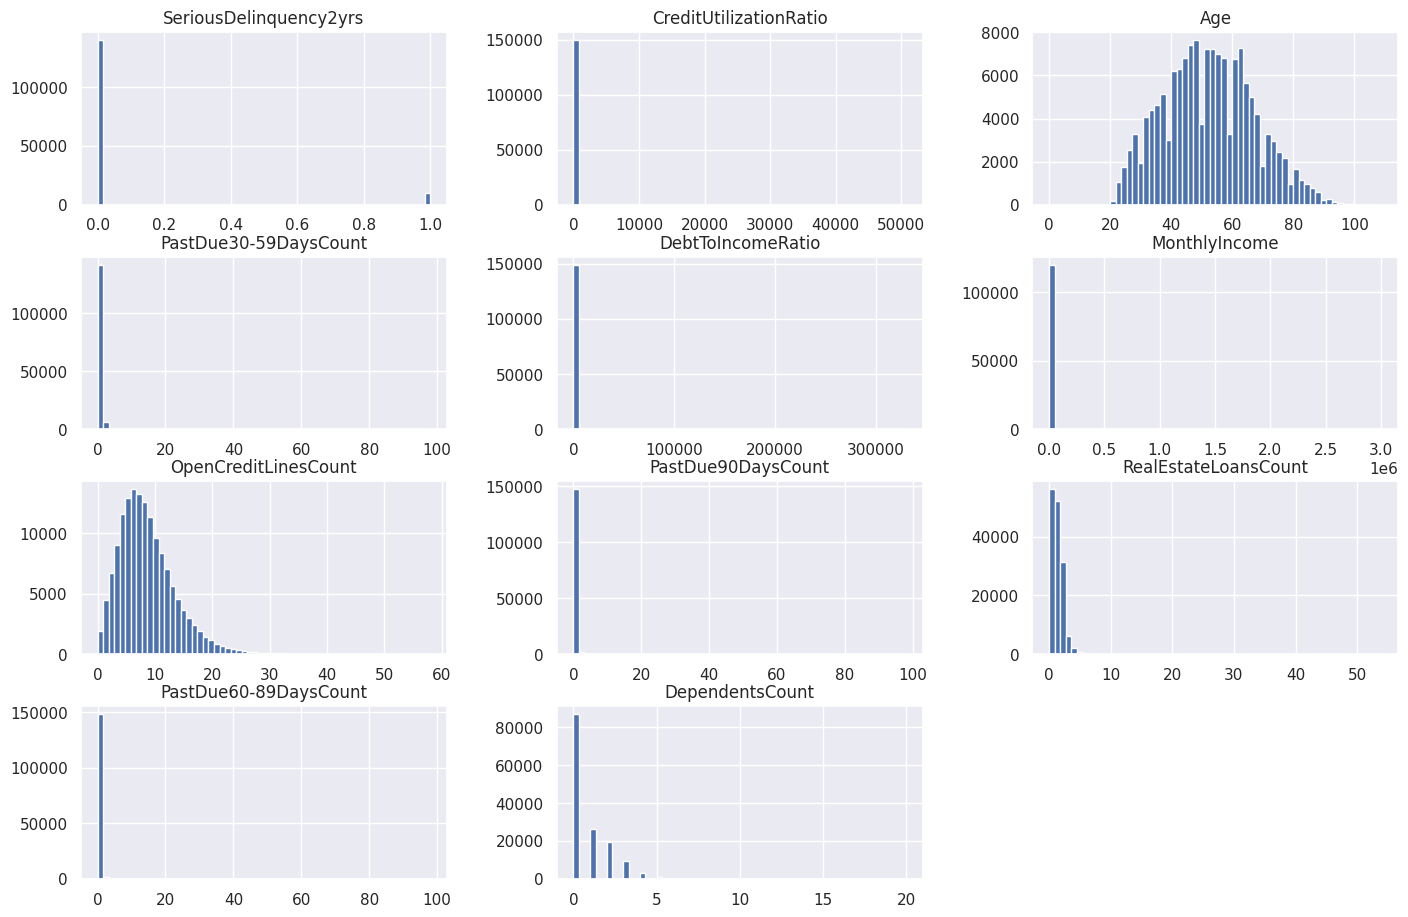

In [88]:
df_train.hist(bins=60, figsize=(17,11))
plt.show()

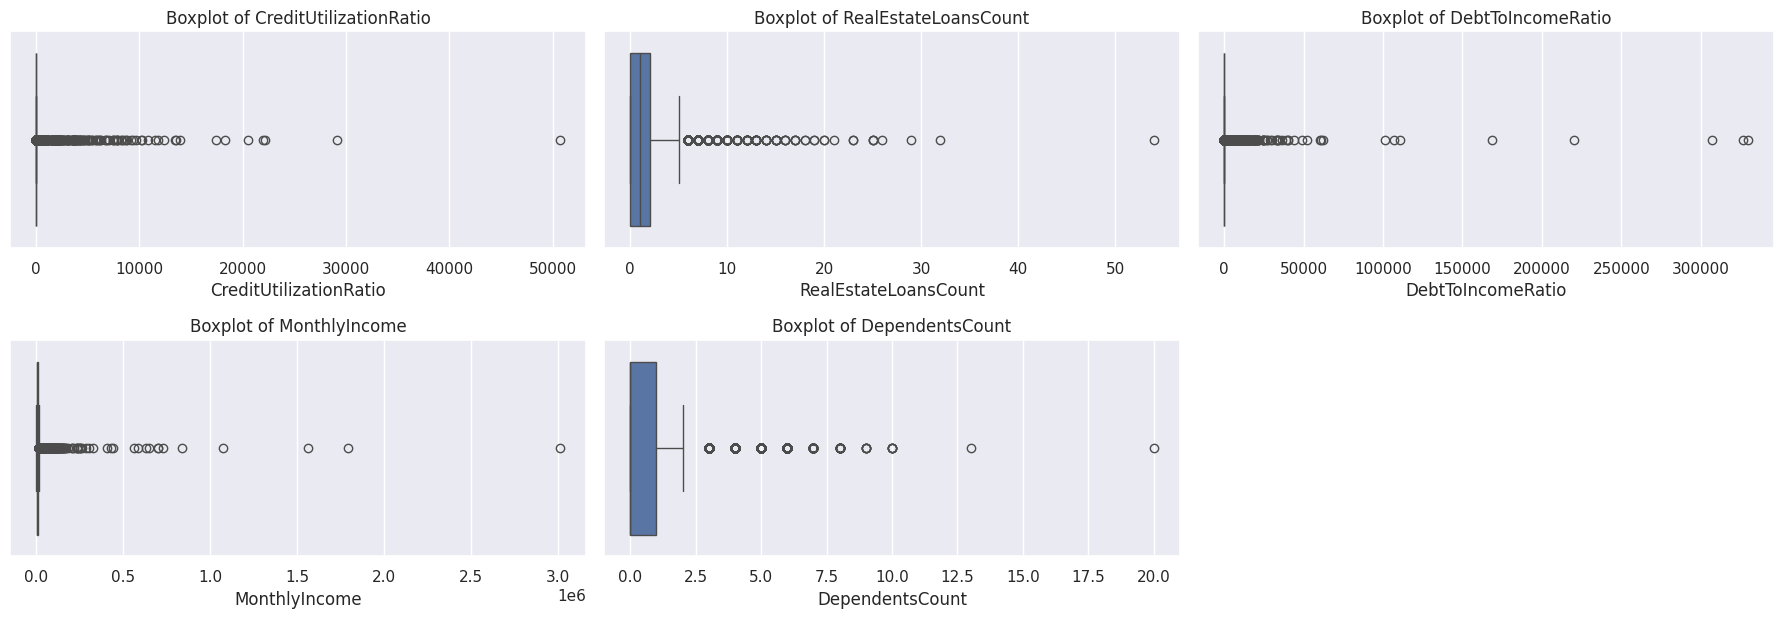

In [89]:
emissions_columns = ['CreditUtilizationRatio', 'RealEstateLoansCount', 'DebtToIncomeRatio', 'MonthlyIncome', 'DependentsCount']

plt.figure(figsize=(18, 12))
for i, col in enumerate(df_train[emissions_columns], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

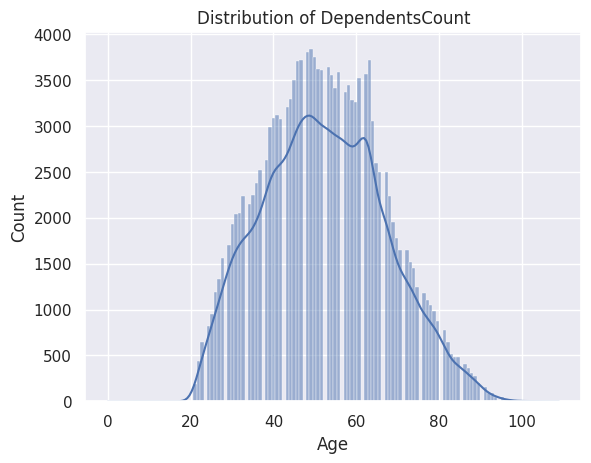

In [90]:
sns.histplot(df_train['Age'], kde=True)
plt.title(f'Distribution of {col}')
plt.show()

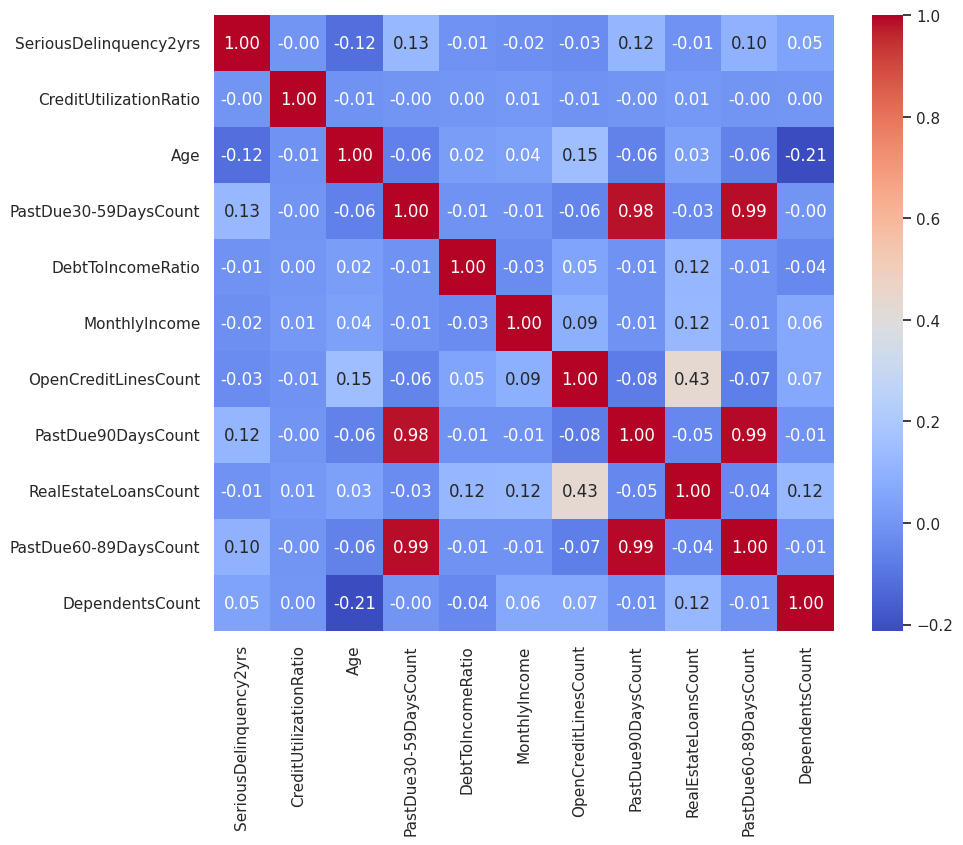

In [91]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

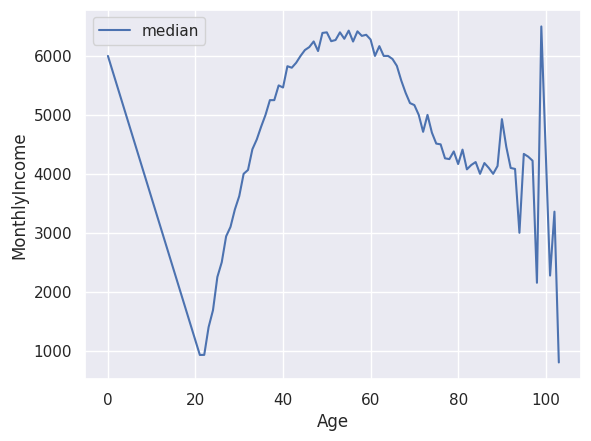

In [92]:
years_and_income_median = df_train.groupby(['Age'])['MonthlyIncome'].median()
years_and_income_median = years_and_income_median.reset_index()
sns.lineplot(years_and_income_median, x='Age', y='MonthlyIncome', label='median')

# Обработка данных

1. Столбец OpenCreditLinesCount следует прологорифмировать, так как распределеник смещено

2. Выбросы обработаем с помощью межквартильного интервала(IQR), в некоторых признаках требуется точечное удаление выбросов (Age)

3. Заменим строки с NaN у признака DependentsCount на моду этого признака

4. Заменим информацию о количестве днях просрочки в признаках PastDue30-59DaysCount, PastDue60-89DaysCount, PastDue90DaysCount булевыми значениями.



In [93]:
def preprocessing(df):

  df = df.copy()

  # Удалим записи со слишким маленьким возрастом
  df = df[df['Age'] >= 21]


  # Заполним пропуски в DependentsCount
  df['DependentsCount'] = df['DependentsCount'].apply(lambda x: 1 if x > 0 else 0)
  df['DependentsCount'] = df['DependentsCount'].fillna(value=df['DependentsCount'].mode()[0])

  # Переведем в категориальные признаки количество задержек
  df['30-59_D'] = df['PastDue30-59DaysCount'].apply(lambda x: 0 if x == 0 else (1 if x < 4 else (2 if x < 10 else 3)))
  df['60-89_D'] = df['PastDue60-89DaysCount'].apply(lambda x: 0 if x == 0 else (1 if x < 4 else (2 if x < 10 else 3)))
  df['90+_D'] = df['PastDue90DaysCount'].apply(lambda x: 0 if x == 0 else (1 if x < 4 else (2 if x < 10 else 3)))

  # Прологорифмируем OpenCreditLinesCount
  df['logOpenCreditLinesCount'] = np.log1p(df['OpenCreditLinesCount'])

  # Заполним пропуски в доходе мидианным значением в каждой возрастной группе
  bins = [21, 25, 30, 35, 40, 50, 60, 70, 110]
  labels = [0, 1, 2, 3, 4, 5, 6, 7]
  df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True, right=False)

  median_income_age = df.groupby('Age_group')['MonthlyIncome'].median()

  df['MonthlyIncome'] = df['MonthlyIncome'].replace(0, np.nan)
  df['MonthlyIncome'] = df.apply(lambda row: median_income_age[row['Age_group']] if pd.isnull(row['MonthlyIncome']) else row['MonthlyIncome'], axis=1)


  emissions_columns = ['CreditUtilizationRatio', 'RealEstateLoansCount', 'DebtToIncomeRatio', 'MonthlyIncome', 'RealEstateLoansCount']

  for col in emissions_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

  df = df.drop(columns=['Age', 'OpenCreditLinesCount', 'PastDue90DaysCount', 'PastDue60-89DaysCount', 'PastDue30-59DaysCount'])

  return df

In [94]:
preproc_train_df = preprocessing(df_train)
preproc_test_df = preprocessing(df_test)


In [95]:
preproc_train_df

,SeriousDelinquency2yrs,CreditUtilizationRatio,DebtToIncomeRatio,MonthlyIncome,RealEstateLoansCount,DependentsCount,30-59_D,60-89_D,90+_D,logOpenCreditLinesCount,Age_group
0,1,0.766127,0.802982,9120.0,5,1,1,0,0,2.639057,4
1,0,0.957151,0.121876,2600.0,0,1,0,0,0,1.609438,4
2,0,0.658180,0.085113,3042.0,0,0,1,0,1,1.098612,3
3,0,0.233810,0.036050,3300.0,0,0,0,0,0,1.791759,2
4,0,0.907239,0.024926,12650.0,1,0,1,0,0,2.079442,4
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,0.225131,2100.0,1,0,0,0,0,1.609438,7
149996,0,0.299745,0.716562,5584.0,1,1,0,0,0,1.609438,4
149997,0,0.246044,1.908032,6333.0,1,0,0,0,0,2.944439,5
149998,0,0.000000,0.000000,5716.0,0,0,0,0,0,1.609438,2


# Baseline (LogisticRegression)

In [96]:
categorical = ['Age_group', '30-59_D', '60-89_D', '90+_D', 'RealEstateLoansCount']
numerical = ['MonthlyIncome', 'logOpenCreditLinesCount', 'DebtToIncomeRatio', 'CreditUtilizationRatio']
binory = ['DependentsCount']

y = preproc_train_df['SeriousDelinquency2yrs']
X = preproc_train_df.drop(columns=['SeriousDelinquency2yrs'])

In [97]:
X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


transformer = ColumnTransformer(transformers=[
    ('categorical', OneHotEncoder(handle_unknown="ignore",sparse_output=False), categorical),
    ('numerical', StandardScaler(), numerical)
], remainder='passthrough')

logit = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

pipeline = Pipeline([('col_transform', transformer), ('model', logit)])

In [99]:
model = pipeline.fit(X_train, y_train)
predict_val = model.predict(X_val)

In [100]:
precision_logit = precision_score(y_val, predict_val)
print(f"Precision : {precision_logit:.4f}")

recall_logit = recall_score(y_val, predict_val)
print(f"Recall : {recall_logit:.4f}")

f1_logit = f1_score(y_val, predict_val)
print(f"F1 : {f1_logit:.4f}")

auc_logit = roc_auc_score(y_val, predict_val)
print(f'AUC : {auc_logit:.4f}')

Precision : 0.2121
Recall : 0.7407
F1 : 0.3297
AUC : 0.7742


In [101]:
preproc_test_df = preproc_test_df.drop(columns='SeriousDelinquency2yrs')
samples = samples.drop(columns='Id')

In [102]:
predict_test = model.predict(preproc_test_df)

In [103]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

samples_binary = (samples > 0.5).astype(int)

precision_logit = precision_score(samples_binary, predict_test)
recall_logit = recall_score(samples_binary, predict_test)
f1_logit = f1_score(samples_binary, predict_test)
auc_logit = roc_auc_score(samples_binary, predict_test)

print(f"Precision : {precision_logit:.4f}")
print(f"Recall    : {recall_logit:.4f}")
print(f"F1        : {f1_logit:.4f}")
print(f"AUC       : {auc_logit:.4f}")


Precision : 0.0729
Recall    : 1.0000
F1        : 0.1360
AUC       : 0.8914


# Final Models

In [105]:
! pip install catboost lightgbm -q

In [111]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score
import numpy as np

y = preproc_train_df['SeriousDelinquency2yrs']
X = preproc_train_df.drop(columns=['SeriousDelinquency2yrs'])

for col in categorical:
    X[col] = X[col].astype('category')

lgb_model = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_auc_scores = []
f1_scores = []

for train_idx, valid_idx in cv.split(X, y):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    lgb_model.fit(X_train, y_train)

    y_pred_proba = lgb_model.predict_proba(X_valid)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)

    roc_auc_scores.append(roc_auc_score(y_valid, y_pred_proba))
    f1_scores.append(f1_score(y_valid, y_pred))

print(f"Средний ROC AUC: {np.mean(roc_auc_scores):.4f}")
print(f"Средний F1-score: {np.mean(f1_scores):.4f}")


[LightGBM] [Info] Number of positive: 8020, number of negative: 111979
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 844
[LightGBM] [Info] Number of data points in the train set: 119999, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066834 -> initscore=-2.636373
[LightGBM] [Info] Start training from score -2.636373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [109]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, f1_score, classification_report

y = preproc_train_df['SeriousDelinquency2yrs']
X = preproc_train_df.drop(columns=['SeriousDelinquency2yrs'])


cat_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=3,
    random_state=42,
    verbose=100,
    cat_features=categorical,
    loss_function='Logloss',
    eval_metric='AUC'
)

cat_model.fit(X, y)

y_pred_proba = cat_model.predict_proba(X)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

print("ROC AUC: ", roc_auc_score(y, y_pred_proba))
print("F1-score: ", f1_score(y, y_pred))
print("Classification report:\n", classification_report(y, y_pred))


0:	total: 955ms	remaining: 3m 10s
100:	total: 24.6s	remaining: 24.1s
199:	total: 46.1s	remaining: 0us
ROC AUC:  0.8687268064346666
F1-score:  0.3049265605875153
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    139973
           1       0.65      0.20      0.30     10026

    accuracy                           0.94    149999
   macro avg       0.80      0.60      0.64    149999
weighted avg       0.93      0.94      0.92    149999

